# CNN with Real Life Images

In [1]:
import os
data_dir = 'C:\\Users\\Rael Nabong\\TEECE1\\CNNActivity'

In [2]:
os.listdir(data_dir)

['new_sample', 'test', 'train']

In [3]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
from matplotlib.image import imread

In [5]:
test_path= data_dir+'\\test\\'
train_path= data_dir+'\\train\\'

In [6]:
os.listdir(test_path)

['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street']

In [7]:
os.listdir(train_path+'buildings')[0]

'0.jpg'

In [8]:
buildings_1 = train_path+'buildings\\'+'0.jpg'

In [9]:
buildings_image = imread(buildings_1)

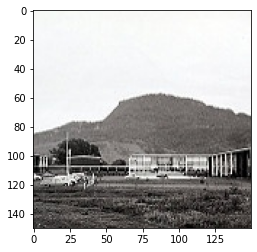

In [10]:
plt.imshow(buildings_image)

In [11]:
buildings_image

array([[[247, 247, 245],
        [247, 247, 245],
        [248, 248, 246],
        ...,
        [248, 248, 248],
        [247, 247, 245],
        [247, 247, 245]],

       [[246, 246, 244],
        [247, 247, 245],
        [247, 247, 245],
        ...,
        [248, 248, 248],
        [247, 247, 245],
        [247, 247, 245]],

       [[246, 246, 244],
        [246, 246, 244],
        [247, 247, 245],
        ...,
        [248, 248, 248],
        [247, 247, 245],
        [247, 247, 245]],

       ...,

       [[ 47,  46,  44],
        [ 62,  61,  59],
        [ 49,  48,  46],
        ...,
        [ 51,  46,  43],
        [ 45,  40,  37],
        [ 94,  89,  86]],

       [[ 77,  76,  74],
        [ 47,  46,  44],
        [ 43,  42,  40],
        ...,
        [ 22,  17,  14],
        [ 55,  50,  47],
        [ 39,  34,  31]],

       [[ 59,  58,  56],
        [ 55,  54,  52],
        [ 60,  59,  57],
        ...,
        [ 31,  26,  23],
        [ 51,  46,  43],
        [ 63,  58,  55]]

In [12]:
forest_1 = train_path+'forest\\'+os.listdir(train_path+'forest')[0]

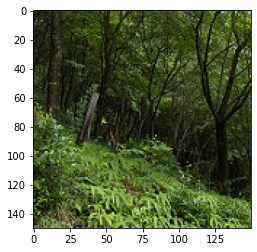

In [13]:
forest_image = imread(forest_1)
plt.imshow(forest_image)

In [14]:
len(os.listdir(train_path+'buildings'))

2191

In [15]:
len(os.listdir(train_path+'forest'))

2271

In [16]:
len(os.listdir(train_path+'glacier'))

2404

In [17]:
len(os.listdir(train_path+'mountain'))

2512

In [18]:
len(os.listdir(train_path+'sea'))

2274

In [19]:
len(os.listdir(train_path+'street'))

2382

In [20]:
len(os.listdir(test_path+'buildings'))

437

In [21]:
len(os.listdir(test_path+'forest'))

474

In [22]:
len(os.listdir(test_path+'glacier'))

553

In [23]:
len(os.listdir(test_path+'mountain'))

525

In [24]:
len(os.listdir(test_path+'sea'))

510

In [25]:
len(os.listdir(test_path+'street'))

501

In [26]:
forest_image.shape

(150, 150, 3)

In [27]:
buildings_image.shape

(150, 150, 3)

In [28]:
# Get the dimensions of the image
dim1 = []
dim2 = []

for image_filename in os.listdir(train_path+'\\buildings'):
    if image_filename != 'Thumbs.db':
        img = imread(train_path+'\\buildings'+'\\'+image_filename)
    d1, d2, color = img.shape
    dim1.append(d1)
    dim2.append(d2)

In [29]:
np.mean(dim1)

149.9881332724783

In [30]:
np.mean(dim2)

150.0

In [31]:
image_shape = (150,150,3)

## Data Preparation

In [32]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [33]:
help(ImageDataGenerator)

Help on class ImageDataGenerator in module tensorflow.python.keras.preprocessing.image:

class ImageDataGenerator(keras_preprocessing.image.image_data_generator.ImageDataGenerator)
 |  ImageDataGenerator(featurewise_center=False, samplewise_center=False, featurewise_std_normalization=False, samplewise_std_normalization=False, zca_whitening=False, zca_epsilon=1e-06, rotation_range=0, width_shift_range=0.0, height_shift_range=0.0, brightness_range=None, shear_range=0.0, zoom_range=0.0, channel_shift_range=0.0, fill_mode='nearest', cval=0.0, horizontal_flip=False, vertical_flip=False, rescale=None, preprocessing_function=None, data_format=None, validation_split=0.0, dtype=None)
 |  
 |  Generate batches of tensor image data with real-time data augmentation.
 |  
 |   The data will be looped over (in batches).
 |  
 |  Arguments:
 |      featurewise_center: Boolean.
 |          Set input mean to 0 over the dataset, feature-wise.
 |      samplewise_center: Boolean. Set each sample mean to 0

In [34]:
image_gen = ImageDataGenerator(rotation_range=20, # rotate the image 20 degrees
                               width_shift_range=0.10, # Shift the pic width by a max of 5%
                               height_shift_range=0.10, # Shift the pic height by a max of 5%
                               rescale=1/255, #Rescale the image by normalizing it.
                               shear_range=0.1, # Shear means cutting away part of the image (max 10%)
                               zoom_range=0.1, # Zoom in by 10% max
                               horizontal_flip=True, # Allo horizontal flipping
                               fill_mode='nearest' # Fill in missing pixels with the nearest filled value
                              )

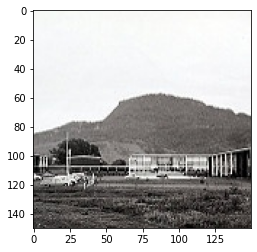

In [35]:
plt.imshow(buildings_image)

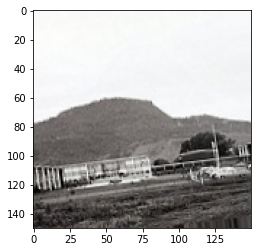

In [36]:
trans = image_gen.random_transform(buildings_image)
plt.imshow(trans)

In [37]:
image_gen.flow_from_directory(train_path)

Found 14034 images belonging to 6 classes.


In [38]:
image_gen.flow_from_directory(test_path)

Found 3000 images belonging to 6 classes.


## Building the Model

In [39]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout, Activation

In [40]:
model = Sequential()

model.add(Conv2D(filters=32, 
                 kernel_size=(3,3),
                 input_shape=image_shape, 
                 activation='relu',))

model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, 
                 kernel_size=(3,3),
                 input_shape=image_shape, 
                 activation='relu',))

model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, 
                 kernel_size=(3,3),
                 input_shape=image_shape, 
                 activation='relu',))

model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(128, activation = 'relu'))

model.add(Dropout(0.5))

model.add(Dense(6, activation='softmax'))


model.compile(loss = 'categorical_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])

In [41]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 18496)             0

In [42]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss',patience=2)

## Model Training

In [43]:
batch_size = 16

In [44]:
train_image_gen = image_gen.flow_from_directory(train_path,
                                               target_size=image_shape[:2],
                                                color_mode='rgb',
                                               batch_size=batch_size,
                                               class_mode='categorical')

Found 14034 images belonging to 6 classes.


In [45]:
test_image_gen = image_gen.flow_from_directory(test_path,
                                               target_size=image_shape[:2],
                                               color_mode='rgb',
                                               batch_size=batch_size,
                                               class_mode='categorical',shuffle=False)

Found 3000 images belonging to 6 classes.


In [46]:
train_image_gen.class_indices

{'buildings': 0,
 'forest': 1,
 'glacier': 2,
 'mountain': 3,
 'sea': 4,
 'street': 5}

In [53]:
results = model.fit_generator(train_image_gen,epochs=20,
                              validation_data=test_image_gen,
                             callbacks=[early_stop])

Epoch 1/20
878/878 [==============================] - 521s 593ms/step - loss: 1.1160 - accuracy: 0.5596 - val_loss: 0.8672 - val_accuracy: 0.6643
Epoch 2/20
878/878 [==============================] - 493s 561ms/step - loss: 0.8976 - accuracy: 0.6642 - val_loss: 0.7568 - val_accuracy: 0.7207
Epoch 3/20
878/878 [==============================] - 480s 546ms/step - loss: 0.7976 - accuracy: 0.7038 - val_loss: 0.7374 - val_accuracy: 0.7387
Epoch 4/20
878/878 [==============================] - 438s 499ms/step - loss: 0.7168 - accuracy: 0.7423 - val_loss: 0.6858 - val_accuracy: 0.7550
Epoch 5/20
878/878 [==============================] - 453s 516ms/step - loss: 0.6683 - accuracy: 0.7602 - val_loss: 0.5871 - val_accuracy: 0.7800
Epoch 6/20
878/878 [==============================] - 457s 521ms/step - loss: 0.6410 - accuracy: 0.7714 - val_loss: 0.5765 - val_accuracy: 0.7957
Epoch 7/20
878/878 [==============================] - 442s 503ms/step - loss: 0.6114 - accuracy: 0.7847 - val_loss: 0.5459 -

In [54]:
from tensorflow.keras.models import load_model

In [55]:
model.save('CNNActivity_model.h5')

In [47]:
from tensorflow.keras.models import load_model
model = load_model('CNNActivity_model.h5')

## Model Evaluation

In [48]:
pred_probabilities = model.predict_generator(test_image_gen)

In [49]:
predictions = pred_probabilities.argmax(axis=1)
predictions

array([0, 0, 0, ..., 3, 0, 5], dtype=int64)

In [50]:
train_image_gen.class_indices

{'buildings': 0,
 'forest': 1,
 'glacier': 2,
 'mountain': 3,
 'sea': 4,
 'street': 5}

In [51]:
from sklearn.metrics import classification_report,confusion_matrix

In [52]:
print(classification_report(test_image_gen.classes,predictions))

              precision    recall  f1-score   support

           0       0.77      0.87      0.82       437
           1       0.96      0.98      0.97       474
           2       0.76      0.84      0.80       553
           3       0.86      0.71      0.78       525
           4       0.86      0.82      0.84       510
           5       0.87      0.85      0.86       501

    accuracy                           0.84      3000
   macro avg       0.85      0.85      0.84      3000
weighted avg       0.85      0.84      0.84      3000



In [53]:
confusion_matrix(test_image_gen.classes,predictions)

array([[381,   3,   7,   1,   5,  40],
       [  5, 464,   1,   2,   0,   2],
       [  7,   2, 466,  43,  24,  11],
       [ 20,   4,  92, 375,  31,   3],
       [ 23,   6,  43,  14, 416,   8],
       [ 60,   6,   2,   3,   5, 425]], dtype=int64)

## Predicting New Image

In [54]:
from tensorflow.keras.preprocessing import image

In [55]:
buildings_1

'C:\\Users\\Rael Nabong\\TEECE1\\CNNActivity\\train\\buildings\\0.jpg'

In [56]:
my_image = image.load_img(buildings_1,target_size=image_shape)

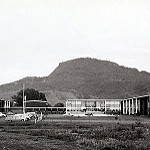

In [57]:
my_image

In [58]:
my_image = image.img_to_array(my_image)

In [59]:
my_image = my_image.reshape(1,150,150,3)

In [60]:
my_image.shape

(1, 150, 150, 3)

In [61]:
model.predict(my_image)

array([[1., 0., 0., 0., 0., 0.]], dtype=float32)

In [62]:
train_image_gen.class_indices

{'buildings': 0,
 'forest': 1,
 'glacier': 2,
 'mountain': 3,
 'sea': 4,
 'street': 5}

In [63]:
folder_path= data_dir+'\\new_sample\\'

In [64]:
import random, os

4069.jpg


array([[0., 0., 0., 1., 0., 0.]], dtype=float32)

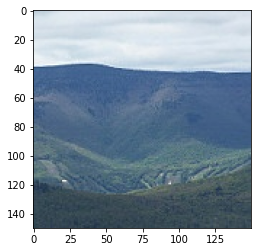

In [85]:
random_image = random.choice([
    x for x in os.listdir(folder_path)
    if os.path.isfile(os.path.join(folder_path, x))
])
print(random_image)

selected = folder_path+random_image
selected_image = imread(selected)
plt.imshow(selected_image)
my_image = image.load_img(selected,target_size=image_shape)
my_image = image.img_to_array(my_image)
my_image = my_image.reshape(1,150,150,3)
model.predict(my_image)

In [86]:
train_image_gen.class_indices

{'buildings': 0,
 'forest': 1,
 'glacier': 2,
 'mountain': 3,
 'sea': 4,
 'street': 5}

21166.jpg


array([[1., 0., 0., 0., 0., 0.]], dtype=float32)

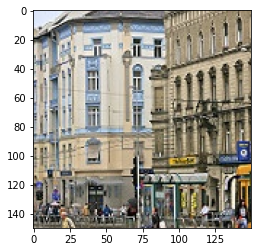

In [87]:
random_image = random.choice([
    x for x in os.listdir(folder_path)
    if os.path.isfile(os.path.join(folder_path, x))
])
print(random_image)

selected = folder_path+random_image
selected_image = imread(selected)
plt.imshow(selected_image)
my_image = image.load_img(selected,target_size=image_shape)
my_image = image.img_to_array(my_image)
my_image = my_image.reshape(1,150,150,3)
model.predict(my_image)

5969.jpg


array([[0., 0., 0., 0., 0., 1.]], dtype=float32)

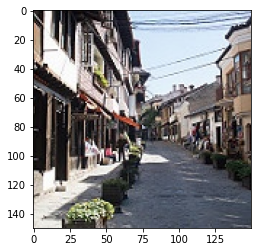

In [88]:
random_image = random.choice([
    x for x in os.listdir(folder_path)
    if os.path.isfile(os.path.join(folder_path, x))
])
print(random_image)

selected = folder_path+random_image
selected_image = imread(selected)
plt.imshow(selected_image)
my_image = image.load_img(selected,target_size=image_shape)
my_image = image.img_to_array(my_image)
my_image = my_image.reshape(1,150,150,3)
model.predict(my_image)

13772.jpg


array([[1., 0., 0., 0., 0., 0.]], dtype=float32)

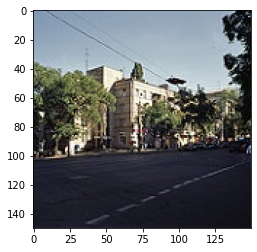

In [89]:
random_image = random.choice([
    x for x in os.listdir(folder_path)
    if os.path.isfile(os.path.join(folder_path, x))
])
print(random_image)

selected = folder_path+random_image
selected_image = imread(selected)
plt.imshow(selected_image)
my_image = image.load_img(selected,target_size=image_shape)
my_image = image.img_to_array(my_image)
my_image = my_image.reshape(1,150,150,3)
model.predict(my_image)

23303.jpg


array([[1., 0., 0., 0., 0., 0.]], dtype=float32)

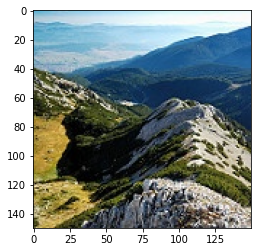

In [91]:
random_image = random.choice([
    x for x in os.listdir(folder_path)
    if os.path.isfile(os.path.join(folder_path, x))
])
print(random_image)

selected = folder_path+random_image
selected_image = imread(selected)
plt.imshow(selected_image)
my_image = image.load_img(selected,target_size=image_shape)
my_image = image.img_to_array(my_image)
my_image = my_image.reshape(1,150,150,3)
model.predict(my_image)

10680.jpg


array([[0., 1., 0., 0., 0., 0.]], dtype=float32)

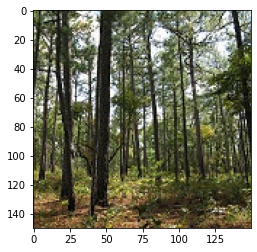

In [94]:
random_image = random.choice([
    x for x in os.listdir(folder_path)
    if os.path.isfile(os.path.join(folder_path, x))
])
print(random_image)

selected = folder_path+random_image
selected_image = imread(selected)
plt.imshow(selected_image)
my_image = image.load_img(selected,target_size=image_shape)
my_image = image.img_to_array(my_image)
my_image = my_image.reshape(1,150,150,3)
model.predict(my_image)

23198.jpg


array([[0., 0., 1., 0., 0., 0.]], dtype=float32)

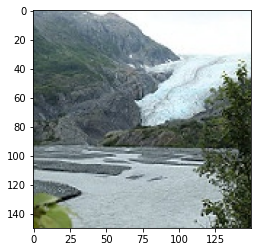

In [95]:
random_image = random.choice([
    x for x in os.listdir(folder_path)
    if os.path.isfile(os.path.join(folder_path, x))
])
print(random_image)

selected = folder_path+random_image
selected_image = imread(selected)
plt.imshow(selected_image)
my_image = image.load_img(selected,target_size=image_shape)
my_image = image.img_to_array(my_image)
my_image = my_image.reshape(1,150,150,3)
model.predict(my_image)

63.jpg


array([[1., 0., 0., 0., 0., 0.]], dtype=float32)

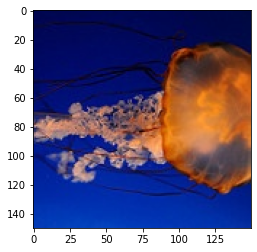

In [96]:
random_image = random.choice([
    x for x in os.listdir(folder_path)
    if os.path.isfile(os.path.join(folder_path, x))
])
print(random_image)

selected = folder_path+random_image
selected_image = imread(selected)
plt.imshow(selected_image)
my_image = image.load_img(selected,target_size=image_shape)
my_image = image.img_to_array(my_image)
my_image = my_image.reshape(1,150,150,3)
model.predict(my_image)

3707.jpg


array([[0., 0., 0., 1., 0., 0.]], dtype=float32)

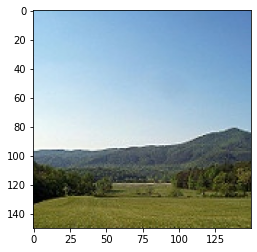

In [100]:
random_image = random.choice([
    x for x in os.listdir(folder_path)
    if os.path.isfile(os.path.join(folder_path, x))
])
print(random_image)

selected = folder_path+random_image
selected_image = imread(selected)
plt.imshow(selected_image)
my_image = image.load_img(selected,target_size=image_shape)
my_image = image.img_to_array(my_image)
my_image = my_image.reshape(1,150,150,3)
model.predict(my_image)

19500.jpg


array([[1., 0., 0., 0., 0., 0.]], dtype=float32)

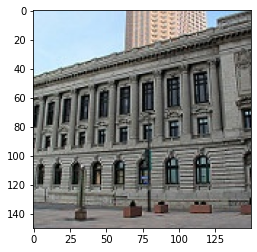

In [101]:
random_image = random.choice([
    x for x in os.listdir(folder_path)
    if os.path.isfile(os.path.join(folder_path, x))
])
print(random_image)

selected = folder_path+random_image
selected_image = imread(selected)
plt.imshow(selected_image)
my_image = image.load_img(selected,target_size=image_shape)
my_image = image.img_to_array(my_image)
my_image = my_image.reshape(1,150,150,3)
model.predict(my_image)

8776.jpg


array([[1., 0., 0., 0., 0., 0.]], dtype=float32)

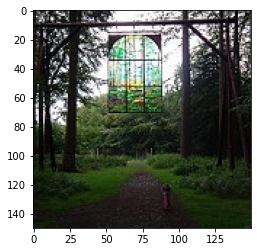

In [103]:
random_image = random.choice([
    x for x in os.listdir(folder_path)
    if os.path.isfile(os.path.join(folder_path, x))
])
print(random_image)

selected = folder_path+random_image
selected_image = imread(selected)
plt.imshow(selected_image)
my_image = image.load_img(selected,target_size=image_shape)
my_image = image.img_to_array(my_image)
my_image = my_image.reshape(1,150,150,3)
model.predict(my_image)

18563.jpg


array([[1., 0., 0., 0., 0., 0.]], dtype=float32)

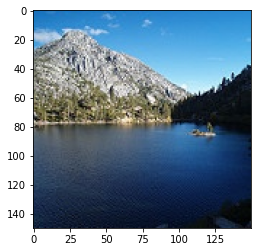

In [104]:
random_image = random.choice([
    x for x in os.listdir(folder_path)
    if os.path.isfile(os.path.join(folder_path, x))
])
print(random_image)

selected = folder_path+random_image
selected_image = imread(selected)
plt.imshow(selected_image)
my_image = image.load_img(selected,target_size=image_shape)
my_image = image.img_to_array(my_image)
my_image = my_image.reshape(1,150,150,3)
model.predict(my_image)

14929.jpg


array([[1., 0., 0., 0., 0., 0.]], dtype=float32)

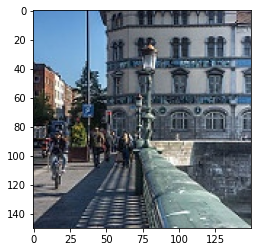

In [107]:
random_image = random.choice([
    x for x in os.listdir(folder_path)
    if os.path.isfile(os.path.join(folder_path, x))
])
print(random_image)

selected = folder_path+random_image
selected_image = imread(selected)
plt.imshow(selected_image)
my_image = image.load_img(selected,target_size=image_shape)
my_image = image.img_to_array(my_image)
my_image = my_image.reshape(1,150,150,3)
model.predict(my_image)

2039.jpg


array([[1., 0., 0., 0., 0., 0.]], dtype=float32)

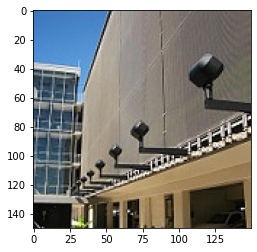

In [108]:
random_image = random.choice([
    x for x in os.listdir(folder_path)
    if os.path.isfile(os.path.join(folder_path, x))
])
print(random_image)

selected = folder_path+random_image
selected_image = imread(selected)
plt.imshow(selected_image)
my_image = image.load_img(selected,target_size=image_shape)
my_image = image.img_to_array(my_image)
my_image = my_image.reshape(1,150,150,3)
model.predict(my_image)

5420.jpg


array([[0., 1., 0., 0., 0., 0.]], dtype=float32)

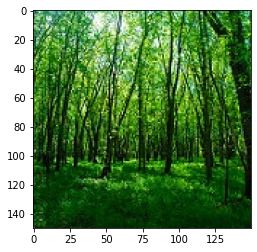

In [113]:
random_image = random.choice([
    x for x in os.listdir(folder_path)
    if os.path.isfile(os.path.join(folder_path, x))
])
print(random_image)

selected = folder_path+random_image
selected_image = imread(selected)
plt.imshow(selected_image)
my_image = image.load_img(selected,target_size=image_shape)
my_image = image.img_to_array(my_image)
my_image = my_image.reshape(1,150,150,3)
model.predict(my_image)

17938.jpg


array([[1., 0., 0., 0., 0., 0.]], dtype=float32)

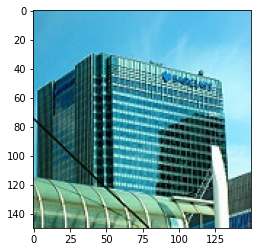

In [114]:
random_image = random.choice([
    x for x in os.listdir(folder_path)
    if os.path.isfile(os.path.join(folder_path, x))
])
print(random_image)

selected = folder_path+random_image
selected_image = imread(selected)
plt.imshow(selected_image)
my_image = image.load_img(selected,target_size=image_shape)
my_image = image.img_to_array(my_image)
my_image = my_image.reshape(1,150,150,3)
model.predict(my_image)

1404.jpg


array([[0., 0., 1., 0., 0., 0.]], dtype=float32)

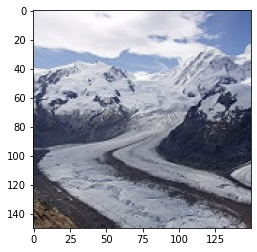

In [115]:
random_image = random.choice([
    x for x in os.listdir(folder_path)
    if os.path.isfile(os.path.join(folder_path, x))
])
print(random_image)

selected = folder_path+random_image
selected_image = imread(selected)
plt.imshow(selected_image)
my_image = image.load_img(selected,target_size=image_shape)
my_image = image.img_to_array(my_image)
my_image = my_image.reshape(1,150,150,3)
model.predict(my_image)

19911.jpg


array([[1., 0., 0., 0., 0., 0.]], dtype=float32)

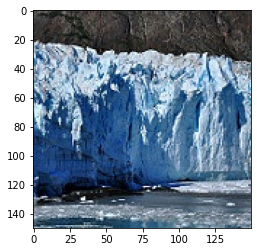

In [116]:
random_image = random.choice([
    x for x in os.listdir(folder_path)
    if os.path.isfile(os.path.join(folder_path, x))
])
print(random_image)

selected = folder_path+random_image
selected_image = imread(selected)
plt.imshow(selected_image)
my_image = image.load_img(selected,target_size=image_shape)
my_image = image.img_to_array(my_image)
my_image = my_image.reshape(1,150,150,3)
model.predict(my_image)

6198.jpg


array([[1., 0., 0., 0., 0., 0.]], dtype=float32)

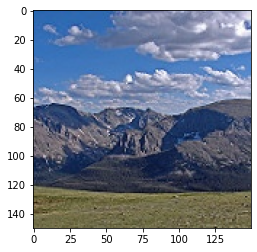

In [121]:
random_image = random.choice([
    x for x in os.listdir(folder_path)
    if os.path.isfile(os.path.join(folder_path, x))
])
print(random_image)

selected = folder_path+random_image
selected_image = imread(selected)
plt.imshow(selected_image)
my_image = image.load_img(selected,target_size=image_shape)
my_image = image.img_to_array(my_image)
my_image = my_image.reshape(1,150,150,3)
model.predict(my_image)

20139.jpg


array([[0., 0., 0., 0., 0., 1.]], dtype=float32)

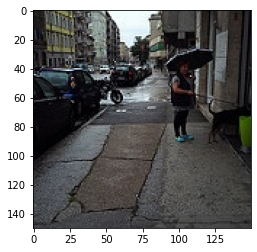

In [122]:
random_image = random.choice([
    x for x in os.listdir(folder_path)
    if os.path.isfile(os.path.join(folder_path, x))
])
print(random_image)

selected = folder_path+random_image
selected_image = imread(selected)
plt.imshow(selected_image)
my_image = image.load_img(selected,target_size=image_shape)
my_image = image.img_to_array(my_image)
my_image = my_image.reshape(1,150,150,3)
model.predict(my_image)

18985.jpg


array([[0., 0., 0., 1., 0., 0.]], dtype=float32)

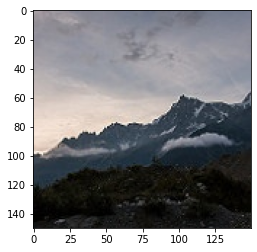

In [124]:
random_image = random.choice([
    x for x in os.listdir(folder_path)
    if os.path.isfile(os.path.join(folder_path, x))
])
print(random_image)

selected = folder_path+random_image
selected_image = imread(selected)
plt.imshow(selected_image)
my_image = image.load_img(selected,target_size=image_shape)
my_image = image.img_to_array(my_image)
my_image = my_image.reshape(1,150,150,3)
model.predict(my_image)

1536.jpg


array([[0., 0., 0., 1., 0., 0.]], dtype=float32)

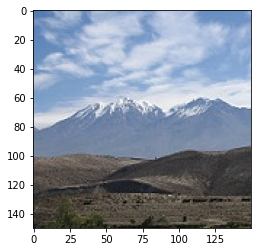

In [130]:
random_image = random.choice([
    x for x in os.listdir(folder_path)
    if os.path.isfile(os.path.join(folder_path, x))
])
print(random_image)

selected = folder_path+random_image
selected_image = imread(selected)
plt.imshow(selected_image)
my_image = image.load_img(selected,target_size=image_shape)
my_image = image.img_to_array(my_image)
my_image = my_image.reshape(1,150,150,3)
model.predict(my_image)

13104.jpg


array([[0., 0., 0., 0., 0., 1.]], dtype=float32)

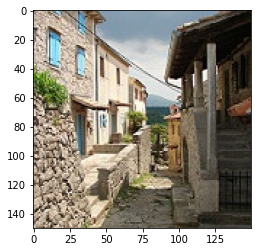

In [134]:
random_image = random.choice([
    x for x in os.listdir(folder_path)
    if os.path.isfile(os.path.join(folder_path, x))
])
print(random_image)

selected = folder_path+random_image
selected_image = imread(selected)
plt.imshow(selected_image)
my_image = image.load_img(selected,target_size=image_shape)
my_image = image.img_to_array(my_image)
my_image = my_image.reshape(1,150,150,3)
model.predict(my_image)

17635.jpg


array([[0., 1., 0., 0., 0., 0.]], dtype=float32)

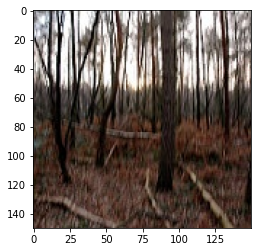

In [135]:
random_image = random.choice([
    x for x in os.listdir(folder_path)
    if os.path.isfile(os.path.join(folder_path, x))
])
print(random_image)

selected = folder_path+random_image
selected_image = imread(selected)
plt.imshow(selected_image)
my_image = image.load_img(selected,target_size=image_shape)
my_image = image.img_to_array(my_image)
my_image = my_image.reshape(1,150,150,3)
model.predict(my_image)

21582.jpg


array([[1., 0., 0., 0., 0., 0.]], dtype=float32)

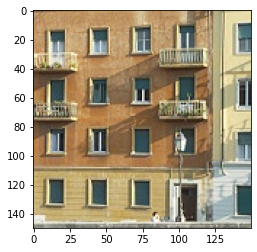

In [136]:
random_image = random.choice([
    x for x in os.listdir(folder_path)
    if os.path.isfile(os.path.join(folder_path, x))
])
print(random_image)

selected = folder_path+random_image
selected_image = imread(selected)
plt.imshow(selected_image)
my_image = image.load_img(selected,target_size=image_shape)
my_image = image.img_to_array(my_image)
my_image = my_image.reshape(1,150,150,3)
model.predict(my_image)

19368.jpg


array([[1., 0., 0., 0., 0., 0.]], dtype=float32)

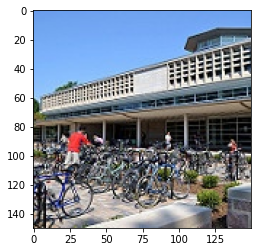

In [137]:
random_image = random.choice([
    x for x in os.listdir(folder_path)
    if os.path.isfile(os.path.join(folder_path, x))
])
print(random_image)

selected = folder_path+random_image
selected_image = imread(selected)
plt.imshow(selected_image)
my_image = image.load_img(selected,target_size=image_shape)
my_image = image.img_to_array(my_image)
my_image = my_image.reshape(1,150,150,3)
model.predict(my_image)

1223.jpg


array([[1., 0., 0., 0., 0., 0.]], dtype=float32)

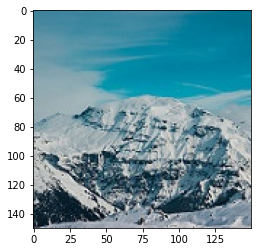

In [138]:
random_image = random.choice([
    x for x in os.listdir(folder_path)
    if os.path.isfile(os.path.join(folder_path, x))
])
print(random_image)

selected = folder_path+random_image
selected_image = imread(selected)
plt.imshow(selected_image)
my_image = image.load_img(selected,target_size=image_shape)
my_image = image.img_to_array(my_image)
my_image = my_image.reshape(1,150,150,3)
model.predict(my_image)

17121.jpg


array([[0., 0., 0., 0., 0., 1.]], dtype=float32)

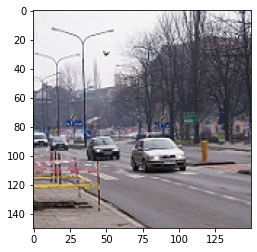

In [142]:
random_image = random.choice([
    x for x in os.listdir(folder_path)
    if os.path.isfile(os.path.join(folder_path, x))
])
print(random_image)

selected = folder_path+random_image
selected_image = imread(selected)
plt.imshow(selected_image)
my_image = image.load_img(selected,target_size=image_shape)
my_image = image.img_to_array(my_image)
my_image = my_image.reshape(1,150,150,3)
model.predict(my_image)

12828.jpg


array([[0., 0., 1., 0., 0., 0.]], dtype=float32)

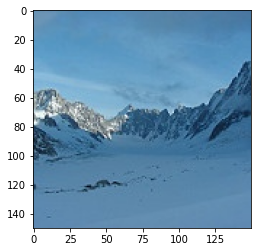

In [143]:
random_image = random.choice([
    x for x in os.listdir(folder_path)
    if os.path.isfile(os.path.join(folder_path, x))
])
print(random_image)

selected = folder_path+random_image
selected_image = imread(selected)
plt.imshow(selected_image)
my_image = image.load_img(selected,target_size=image_shape)
my_image = image.img_to_array(my_image)
my_image = my_image.reshape(1,150,150,3)
model.predict(my_image)

14139.jpg


array([[1., 0., 0., 0., 0., 0.]], dtype=float32)

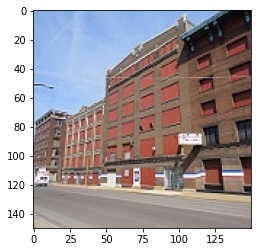

In [144]:
random_image = random.choice([
    x for x in os.listdir(folder_path)
    if os.path.isfile(os.path.join(folder_path, x))
])
print(random_image)

selected = folder_path+random_image
selected_image = imread(selected)
plt.imshow(selected_image)
my_image = image.load_img(selected,target_size=image_shape)
my_image = image.img_to_array(my_image)
my_image = my_image.reshape(1,150,150,3)
model.predict(my_image)